### Initial Analysis of Data Set

- Which departments get the most funding? 
- What type of research do they conduct? 
- Where is the money coming from, by department?

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datascience import *
import numpy as np

import locale
import re
import csv

In [2]:
grant_data = Table.read_table('cleaned_research_spo_data.csv')
grant_data

Activity Type,Amount,Sponsor Class,Sponsor,Division,Department,Fund,UCB Award Number,PI Name,Project Begin Date,Project End Date,Title,Dept/Division,Grant Amount,Year
Basic research,"$346,371,180",Industry,"BP Group (BP America, BP Exploration, British Petroleum)",Vice Chancellor for Research ORUs,nan,86016,022711-002,"Fleming, Graham R",7/1/2007,6/30/2017,Energy Biosciences Institute,Vice Chancellor for Research ORUs,346371180,2007
Basic research,"$132,635,047",Federal,NASA National Aeronautics and Space Administration Godda ...,Vice Chancellor for Research ORUs,SSL Space Sciences Lab,27174,032139-002,"Immel, Thomas",1/11/2012,2/28/2020,The Ionospheric CONnection Explorer (ICON) Phases B-F,SSL Space Sciences Lab,132635047,2012
Basic research,"$59,640,000",Not for Profit,Simons Foundation,VC Res Other Research Units,Simons Institute for the Theory of Computing,95650,033018-002,"Karp, Richard M",7/1/2012,6/30/2022,Simons Institute for the Theory of Computing,Simons Institute for the Theory of Computing,59640000,2012
Instruction,"$32,745,069",State of California,California Department of Social Services,School of Social Welfare,nan,77954,029530-002,"Midanik, Lorraine T",7/1/2010,6/30/2011,Title IV-E Social Work Training Program,Social Welfare,32745069,2010
Instruction,"$32,587,458",State of California,California Department of Social Services,School of Social Welfare,Social Welfare,84402,033267-002,"Edleson, Jeffrey L",7/1/2012,6/30/2013,Title IV-E Social Work Training Program,Social Welfare,32587458,2012
Instruction,"$32,463,656",State of California,California Department of Social Services,School of Social Welfare,Social Welfare,96762,031469-002,"Davis, Sam",7/1/2011,6/30/2012,Title IV-E Social Work Training Progam,Social Welfare,32463656,2011
Instruction,"$30,752,572",State of California,California Department of Social Services,School of Social Welfare,nan,15345,027256-002,"Midanik, Lorraine T",7/1/2009,6/30/2010,Title IV-E Social Work Training Program,Social Welfare,30752572,2009
Basic research,"$29,092,000",Federal,NSF National Science Foundation,VC Res Other Research Units,DUSEL Deep Underground Science & Engineering Laboratory,30035,028649-002,"Lesko, Kevin",10/1/2009,9/30/2011,Developing the Preliminary Design for the Deep Undergrou ...,DUSEL Deep Underground Science & Engineering Laboratory,29092000,2009
Instruction,"$28,986,867",State of California,California Department of Social Services,School of Social Welfare,Social Welfare,77730,025069-002,"Midanik, Lorraine T",7/1/2008,6/30/2009,Title IVE Social Work Training Program,Social Welfare,28986867,2008
Basic research,"$27,573,125",Not for Profit,MARCO Microelectronics Advanced Research Corporation,College of Engineering,ERSO Engineering Research Support Organization,85550,034206-002,"Lee, Edward A",1/15/2013,10/31/2017,The TerraSwarm Research Center,ERSO Engineering Research Support Organization,27573125,2013


### Data Science Research Trends

- How much have different sources invested in data science research and how much are they emphasizing it?
- Which departments are most involved in data science research? 
    - Measuring which different research departments emphasize data science the most at Berkeley.

In [3]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [4]:
trends = grant_data.drop([1] + list(range(4, 11)))
ds_words = Table.read_table('ds_words.csv').column(0)
data_science = ['data', 'machine learning', 'comput']
visualization = ['visualization', 'model', 'D3.js', 'graph']
statistical_analysis = ['mathematical modeling', 'analytics', 'analysis', 'regression','statistic', 'probability']
programming = ['matplotlib', 'python', 'algorithm', 'coding', 'computational', 'comput']
data_management = ['database', 'data management', 'network', 'system', 'aggregation', 'processing', 'parallel']
theory = ['intelligence', 'algorithm', 'recognition', 'predictive', 'information theory', 'optimization']
new_words = data_science+data_management+visualization+statistical_analysis+programming+theory

In [5]:
def entries_containing_words(table, words):
    entries = []
    for i in np.arange(table.num_rows):
        title = table['Title'][i]
        for word in words:
            if word in title or word.title() in title:
                entries.append(i)
                break
    return entries

def by_dept(table):
    dept_list=[]
    for dept in set(table.sort('Dept/Division').column('Dept/Division')):
        dept_list.append(table.where('Dept/Division', dept))
    return dept_list

ds_rows = entries_containing_words(trends, new_words)

In [6]:
ds_trends = trends.take(ds_rows)
ds_trends

Activity Type,Sponsor Class,Sponsor,Title,Dept/Division,Grant Amount,Year
Basic research,Not for Profit,Simons Foundation,Simons Institute for the Theory of Computing,Simons Institute for the Theory of Computing,59640000,2012
Basic research,Federal,NSF National Science Foundation,The Center of Integrated Nanomechanical Systems (COINS) ...,BNNI Berkeley Nanoscience & Nanoengineering Institute,11582033,2009
Basic research,Federal,NIH National Institute of General Medical Sciences,Center for RNA Systems Biology,The California Institute for Quantitative Biosciences (QB3),9992931,2012
Basic research,Not for Profit,Gordon and Betty Moore Foundation,Moore/Sloan Data Science Environment,Data Science Institute,9990000,2013
Basic research,Federal,NSF National Science Foundation,"Making Sense at Scale with Algorithms, Machines and People",ERSO Engineering Research Support Organization,9874991,2012
Basic research,Not for Profit,MARCO Microelectronics Advanced Research Corporation,Multi-Scale Systems Center,ERSO Engineering Research Support Organization,9457500,2009
Basic research,Federal,NIH National Institute of Allergy & Infectious Diseases,Mouse Models for Understanding Host Responses to Intrace ...,MCB Molecular & Cell Biology,8314457,2006
Basic research,Industry,Microsoft Corporation,University Parallel Computing Research Center,ERSO Engineering Research Support Organization,6000000,2007
Basic research,Not for Profit,MARCO Microelectronics Advanced Research Corporation,Systems on Nanoscale Information fabriCs (SONIC) Center,ERSO Engineering Research Support Organization,5133749,2013
Basic research,Federal,DOD Advanced Research Projects Agency,Algorithms and Specializers for Provably-optimal Impleme ...,ERSO Engineering Research Support Organization,5100000,2012


In [7]:
ds_list = by_dept(ds_trends)
for i in np.arange(len(ds_list)):
    ds_list[i] = ds_list[i].group('Year', list).apply(sum, 'Grant Amount list')

In [8]:
ds_trends = ds_trends.groups(['Dept/Division', 'Year'], list)
ds_trends.append_column('Grant Amount', ds_trends.apply(sum, 'Grant Amount list'))
ds_trends = ds_trends.drop('Grant Amount list')
ds_trends = ds_trends.sort('Grant Amount', descending=True)

In [9]:
trend_counts = trends.group('Dept/Division').relabel('count', 'Grants')
ds_trends = ds_trends.with_column('DS Grants', ds_trends.apply(len, 'Title list'))
ds_trends = ds_trends.join('Dept/Division', trend_counts)

In [10]:
# Which deparments have a high ratio of data science oriented grants over others?
# Hypothesis: CS, Stats, Quant Bio?

avg_ratio_year = []
for year in np.arange(1996, 2017):
    year_table = trends.where('Year', year)
    ds_year_table = ds_trends.where('Year', year)
    stats = [np.mean(ds_year_table['DS Grants']/ds_year_table['Grants']),
            sum(ds_year_table['Grant Amount'])/sum(year_table['Grant Amount'])]
    avg_ratio_year.append(stats)

def basic_weighting(grant_amount, ds_grants, grants):
    ratio = ds_grants/grants
    ratio_weight = 100
    num_grants_weight = 1
    amount_grants_weight = 1
    if grant_amount > 100000:
        amount_grants_weight = grant_amount/100000
    if ds_grants > 300:
        num_grants_weight = ds_grants/300
    return ratio*ratio_weight*num_grants_weight*amount_grants_weight

def weighting_by_year(grant_amount, ds_grants, grants, year):
    ratio_weight = 1
    num_grants_weight = 1
    amount_grants_weight = 1
    num_grants = 1
    ratio = (ds_grants/grants)/avg_ratio_year[year-1996][0]
    amount_grant = grant_amount/avg_ratio_year[year-1996][1]
#     if grant_amount > 100000:
#         amount_grants_weight = grant_amount/100000
    if ds_grants > 300:
        num_grants = ds_grants/300
    return ratio*ratio_weight*num_grants*num_grants_weight*amount_grant*amount_grants_weight/(10**6)

In [11]:
ds_trends = ds_trends.with_column('DS Emphasis', ds_trends.apply(weighting_by_year, \
                                                    ['Grant Amount', 'DS Grants', 'Grants', 'Year']))
ds_trends.sort('DS Emphasis', descending=True)

Dept/Division,Year,Activity Type list,Sponsor Class list,Sponsor list,Title list,Grant Amount,DS Grants,Grants,DS Emphasis
Simons Institute for the Theory of Computing,2012,"['Basic research', 'Basic research', 'Basic research', ' ...","['Not for Profit', 'Not for Profit', 'Not for Profit', ' ...","['Simons Foundation', 'Simons Foundation', 'Simons Found ...","['Simons Institute for the Theory of Computing', 'Simons ...",31500000,4,20,595.036
ERSO Engineering Research Support Organization,2008,"['Basic research', 'Basic research', 'Basic research', ' ...","['University of California', 'University of California', ...",['UC Discovery Grant-Electron Manufacturing & New Materi ...,"['IMPACT: Integrated Modeling, Process, and Computation ...",47611819,319,6085,502.537
EECS Electrical Engineering & Computer Sciences,2014,"['Basic research', 'Basic research', 'Basic research', ' ...","['Federal', 'Not for Profit', 'Federal', 'Industry', 'Fe ...","['DOD ONR Office of Naval Research', 'Gordon and Betty M ...",['Top-Down and Bottom-up Visual Mechanisms at Multiple S ...,22096998,73,460,497.527
Data Science Institute,2013,"['Basic research', 'Basic research', 'Basic research']","['Not for Profit', 'Not for Profit', 'Not for Profit']","['Gordon and Betty Moore Foundation', 'Alfred P. Sloan F ...","['Moore/Sloan Data Science Environment', 'Moore/Sloan Da ...",11500000,3,8,482.141
ERSO Engineering Research Support Organization,2007,"['Basic research', 'Basic research', 'Basic research', ' ...","['Industry', 'Industry', 'Federal', 'Industry', 'Industr ...","['Microsoft Corporation', 'Intel Corporation', 'DOD ONR ...","['University Parallel Computing Research Center', 'Unive ...",35751938,303,6085,408.489
ERSO Engineering Research Support Organization,2011,"['Basic research', 'Basic research', 'Basic research', ' ...","['Industry', 'Federal', 'Industry', 'Federal', 'Not for ...","['Intel Corporation', 'NSF National Science Foundation', ...","[""SCRUB: Secure Computing Research for Users' Benefit"", ...",42501318,292,6085,286.8
ERSO Engineering Research Support Organization,2009,"['Basic research', 'Basic research', 'Basic research', ' ...","['Not for Profit', 'Federal', 'Federal', 'Federal', 'Fed ...","['MARCO Microelectronics Advanced Research Corporation', ...","['Multi-Scale Systems Center', 'Hardware, Languages, and ...",53170527,235,6085,273.097
ERSO Engineering Research Support Organization,2012,"['Basic research', 'Basic research', 'Basic research', ' ...","['Federal', 'Federal', 'Federal', 'Federal', 'Federal', ...","['NSF National Science Foundation', 'DOD Advanced Resear ...","['Making Sense at Scale with Algorithms, Machines and Pe ...",59994160,241,6085,224.423
ERSO Engineering Research Support Organization,2010,"['Basic research', 'Basic research', 'Basic research', ' ...","['Federal', 'Federal', 'Federal', 'Federal', 'Federal', ...","['DAF AFOSR Air Force Office of Scientific Research', 'D ...","['Optimal Design of Resilient Capacitated Networks', 'TA ...",33585644,226,6085,221.421
ERSO Engineering Research Support Organization,2006,"['Basic research', 'Basic research', 'Basic research', ' ...","['Federal', 'Federal', 'Federal', 'Federal', 'Federal', ...","['DA ARO Army Research Office', 'DOE Department of Energ ...",['Heterogeneous Sensor Webs for Autonated Target Recogni ...,22145553,236,6085,188.467


In [12]:
top_100_grants = trends.sort('Grant Amount', descending=True).take(range(0,100))
top_100_grants = top_100_grants.with_column('Grant Ranking', np.arange(1, 101))
top_ds_grants = top_100_grants.take(entries_containing_words(top_100_grants, new_words))
print(str(top_ds_grants.num_rows) + '% of top 100 funded grants are data-centric')

7% of top 100 funded grants are data-centric


In [13]:
top_ds_grants

Activity Type,Sponsor Class,Sponsor,Title,Dept/Division,Grant Amount,Year,Grant Ranking
Basic research,Not for Profit,Simons Foundation,Simons Institute for the Theory of Computing,Simons Institute for the Theory of Computing,59640000,2012,3
Basic research,Federal,NSF National Science Foundation,The Center of Integrated Nanomechanical Systems (COINS) ...,BNNI Berkeley Nanoscience & Nanoengineering Institute,11582033,2009,44
Basic research,Federal,NIH National Institute of General Medical Sciences,Center for RNA Systems Biology,The California Institute for Quantitative Biosciences (QB3),9992931,2012,58
Basic research,Not for Profit,Gordon and Betty Moore Foundation,Moore/Sloan Data Science Environment,Data Science Institute,9990000,2013,59
Basic research,Federal,NSF National Science Foundation,"Making Sense at Scale with Algorithms, Machines and People",ERSO Engineering Research Support Organization,9874991,2012,61
Basic research,Not for Profit,MARCO Microelectronics Advanced Research Corporation,Multi-Scale Systems Center,ERSO Engineering Research Support Organization,9457500,2009,64
Basic research,Federal,NIH National Institute of Allergy & Infectious Diseases,Mouse Models for Understanding Host Responses to Intrace ...,MCB Molecular & Cell Biology,8314457,2006,76


In [14]:
unique_div = np.unique(grant_data['Division'])
unique_dept_div = list(np.unique(grant_data['Dept/Division']))

### Time series analysis of dept/division grant funding

In [15]:
def plot_dept(table, dept):
    table = table.select(['Dept/Division', 'Year', 'Grant Amount'])
    table = table.where('Dept/Division', dept)
    table = table.drop('Dept/Division').group('Year', sum)
    plt.plot(table['Year'], table['Grant Amount sum'])
    return table

def dept_time_analysis(table, dept1, dept2):
    if dept1 != 'None':
        plot_dept(table, dept1)
    if dept2 != 'None':
        plot_dept(table, dept2)

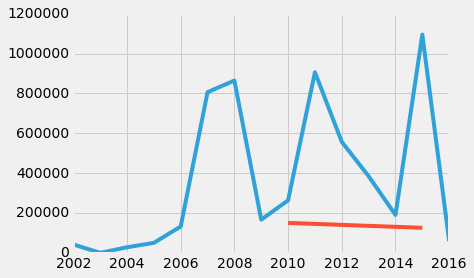

In [16]:
interact(dept_time_analysis, table=fixed(grant_data), dept1=unique_dept_div, dept2=['None']+unique_dept_div)

### Time series analysis of types of data-related projects

In [17]:
def plot_table(table, category):
    table = table.select(['Year', category]).group('Year', sum)
    plt.plot(table['Year'], table[category + ' sum'])

data_unique_dept = ['None'] + list(np.unique(ds_trends['Dept/Division']))

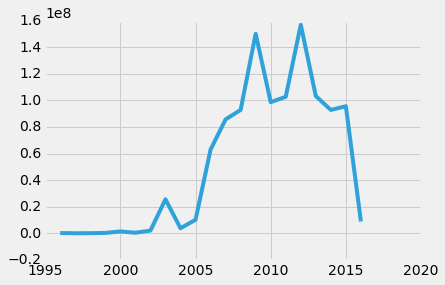

In [18]:
plot_table(ds_trends, 'Grant Amount')

In [19]:
ds_trends.with_column('Normalized Data Grant')

TypeError: with_column() missing 1 required positional argument: 'values'

In [ ]:
ds_trends.group('Year').show()